In [10]:
import numpy as np
import scipy 
import librosa 
import matplotlib.pyplot as plt

In [2]:
# filename = librosa.util.example_audio_file()
filename = 'data/2person/case1_noOverlap.wav'

In [3]:
y, sr = librosa.load(filename)

In [4]:
hop_length = 512
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=20)

In [5]:
mfcc.shape

(20, 3661)

In [6]:
mfcc[:,1]

array([-486.82452  ,   53.87013  ,   34.403343 ,   43.03163  ,
         34.15162  ,    5.0312567,  -10.541114 ,   -7.615076 ,
         -7.4519434,  -23.164286 ,  -26.944237 ,   -7.6629114,
         -4.457895 ,  -14.65357  ,   -6.5235624,    2.591185 ,
         -0.7535883,   -3.1659265,   -4.2452   ,   -1.8281313],
      dtype=float32)

In [7]:
fet = mfcc.T

In [8]:
fet.shape

(3661, 20)

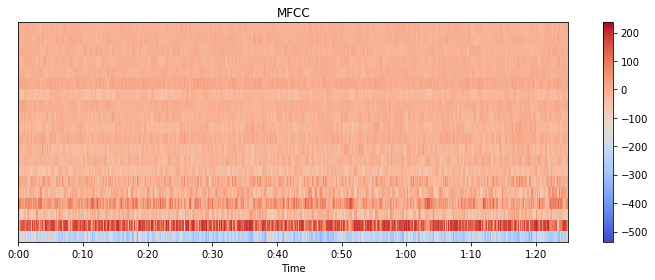

In [9]:
import librosa.display as display
plt.figure(figsize=(10, 4))
display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [52]:
import librosa.core.pitch as pitch
pitch, mag = pitch.piptrack(y=y, sr=sr, hop_length=hop_length,n_fft=512)

In [53]:
pitch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
#https://github.com/YannickJadoul/Parselmouth
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
filename = 'data/3person/3person.wav'
snd = parselmouth.Sound(filename)

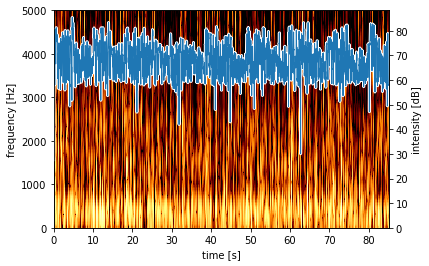

In [13]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # 

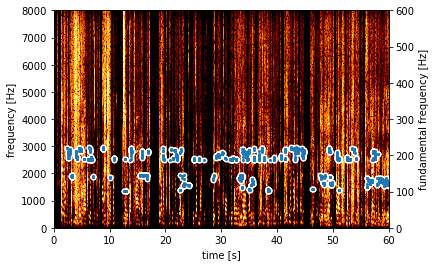

In [99]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
#     
    #male pitch 100-146
    pitch_values[pitch_values<=100] = 0
    
    #female pitch 188-221
    pitch_values[(pitch_values>=147) & (pitch_values<=187)] = 0
    pitch_values[pitch_values>=222] = 0
    
    pitch_values[pitch_values==0] = np.nan
    
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")


# filename = 'data/2person/case1_noOverlap.wav'
filename='data/4person/labcon_good30.wav'
snd = parselmouth.Sound(filename)
    
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [100]:
mfccs = snd.to_mfcc()

In [101]:
print(len(mfccs))
print(len(pitch))

11995
5997


In [102]:
mfccs[0]

In [103]:
snd.n_samples

960000

In [104]:
snd.sampling_frequency

16000.0

In [105]:
snd.n_frames

960000

In [106]:
snd.total_duration

60.0

In [107]:
snd.get_time_step()

6.25e-05

In [108]:
snd.get_number_of_frames()

960000

In [109]:
snd.ys

<bound method PyCapsule.ys of <parselmouth.Sound object at 0x1c1ae795b0>>

In [110]:
snd.get_time_from_frame_number(100)

0.00621875

In [111]:
snd.nt

960000

In [112]:
pitch.selected_array['frequency']

array([  0.        ,   0.        ,   0.        , ..., 245.94158654,
       241.5946507 , 240.10844835])

In [113]:
snd.sampling_period

6.25e-05

In [114]:
snd.time_step

6.25e-05

In [134]:
filename='data/10person/10person_sample1.wav'
snd = parselmouth.Sound(filename)
pitch = snd.to_pitch(time_step=0.15,pitch_floor=90.0,pitch_ceiling=230)
mfcc = snd.to_mfcc(time_step=0.15,number_of_coefficients=20)

In [135]:
print(len(pitch))
print(len(mfcc))


3547
3548


In [136]:
pitch_values = pitch.selected_array['frequency']
mfcc_values = mfcc

In [137]:
feat =mfcc.to_matrix_features().as_array()

In [138]:
feat.shape

(4, 3548)

In [139]:
mt = mfcc.to_matrix()
a = mfcc.to_array()
a.shape


(21, 3548)

In [140]:
# public static int unsupervisedAlgorithm(List<SimpleMatrix> mfcc, List<Double> pitch) {

# 	  List<SimpleMatrix> new_mfcc = new ArrayList<SimpleMatrix>();
# 	  // admit the first segment as speaker 1
# 	  new_mfcc.add(mfcc.get(0));
# 	  List<Double> new_pitch = new ArrayList<Double>();
# 	  new_pitch.add(pitch.get(0));
# 		int speaker_count = 1;

# 	  for (int i = 1; i < mfcc.size(); i++) {
# 	  	int diff_count = 0;
# 	    for (int j = 0; j < speaker_count; j++) {
# 	    	// for each audio segment i, compare it with the each admitted audio segment j
# 	    	double mfcc_dist = getDistance(mfcc.get(i), new_mfcc.get(j));
# 	    	// different gender
# 	      if (genderDecision(pitch.get(i), new_pitch.get(j)) == 0) { 
# 	      	diff_count = diff_count + 1;
# 	      } 
# 	      // mfcc distance is larger than a threshold
# 	      else if (mfcc_dist >= Constants.mfcc_dist_diff_un) {
# 	      	diff_count = diff_count + 1;            	
# 	      }
# 	      // same speaker
# 	      else {
# 	      	if (mfcc_dist <= Constants.mfcc_dist_same_un && genderDecision(pitch.get(i), new_pitch.get(j)) == 1) {
# 		        new_mfcc.set(j, new_mfcc.get(j).combine(new_mfcc.get(j).numRows(), 0, mfcc.get(i))); // merge
# 						break;
# 		      }
# 	      }
# 	    }
# 	    // admit as a new speaker if different from all the admitted speakers.
# 	    if (diff_count == speaker_count) {
# 	    	speaker_count = speaker_count + 1;
# 	      new_mfcc.add(mfcc.get(i));
# 	      new_pitch.add(pitch.get(i));
# 	    }
# 	  }
# 	  return speaker_count;
# 	}

In [437]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler



def get_gender(p):
#     if p>=100 and p<=160:
#         return 1
    if p<=160:
        return 1
#     elif p>=188 and p<=221:
    elif p>=190:
        return 2
    return 0 #undetermined


def speaker_count(filename):
    snd = parselmouth.Sound(filename)
    pitch = snd.to_pitch_ac(time_step=0.15,pitch_floor=90.0,pitch_ceiling=250)
    pitch_values = pitch.selected_array['frequency']
    mfcc = snd.to_mfcc(time_step=0.15,number_of_coefficients=20)

    mfcc_values = mfcc.to_array()
    r,c = mfcc_values.shape
    
    scaler = StandardScaler()
    
    mfcc_values = scaler.fit_transform(mfcc_values)
    speaker_count=1
    C = [mfcc_values[2:,0]]
    C_p = [pitch_values[0]]
    for i in range(1,len(pitch_values)): # number of mfcc
        if pitch_values[i]==0:
            continue
        diff_count = 0
        u=mfcc_values[2:,i]
        for j in range(speaker_count):
            d = abs(np.degrees(cosine(u,C[j])))
#             print(d)
            if (get_gender(pitch_values[i])!=get_gender(C_p[j])):
                diff_count+=1
            elif d>=23:
                diff_count = diff_count + 1
            else:
                if (d<=15 and get_gender(pitch_values[i])==get_gender(C_p[j])):
                    C[j] = np.mean([u,C[j]],axis=0)
                    C[j] = C[j] / np.sqrt(np.sum(C[j]**2))
                    C_p[j] = np.mean([C_p[j],pitch_values[i]])
                    break
        if (diff_count == speaker_count):
            speaker_count = speaker_count + 1
            C.append(u)
            C_p.append(pitch_values[i])


    print(speaker_count)
              
        

In [445]:
filename='data/10person/10person_sample1.wav'
speaker_count(filename)

9
